In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read Dataset
df = pd.read_csv('vgames2.csv', index_col=0)
num_df_before = df.shape[0]

#refine Year
df.loc[df.Year<=22,'Year'] += 2000
df.loc[df.Year<=99,'Year'] += 1900

#refine Sales data
sales_col = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for col in sales_col:
  df[col] = df[col].str.replace('M','')
  df[col] = [(
      ele.replace('K', '') if re.match('.*K', ele) else float(ele) * 1000
      ) for ele in df[col]]

In [ ]:
#NA control

In [3]:
#drop NAs
df = df.dropna(subset = ['Year', 'Genre']).reset_index(drop = True)
num_df_after = df.shape[0]

In [4]:
#re-define data type
df[['Platform', 'Genre', 'Publisher']] = df[['Platform', 'Genre', 'Publisher']].astype('category')
df[sales_col] = df[sales_col].astype(int)
df = df.convert_dtypes()

In [5]:
print(f'The number of    RAW data: {num_df_before}\nThe number of not-NA data: {num_df_after}\nduration: {np.amin(df.Year)} ~ {np.amax(df.Year)}')
df.info()

The number of    RAW data: 16598
The number of not-NA data: 16277
duration: 1980 ~ 2020
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         16277 non-null  string  
 1   Platform     16277 non-null  category
 2   Year         16277 non-null  Int64   
 3   Genre        16277 non-null  category
 4   Publisher    16241 non-null  category
 5   NA_Sales     16277 non-null  Int64   
 6   EU_Sales     16277 non-null  Int64   
 7   JP_Sales     16277 non-null  Int64   
 8   Other_Sales  16277 non-null  Int64   
dtypes: Int64(5), category(3), string(1)
memory usage: 928.5 KB


In [6]:
df[df.Platform == 'PSP'].describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000
mean,2008.726739,89.270746,56.286672,63.470243,34.761106
std,2.433842,204.900257,183.909926,215.824533,107.154928
min,2004.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,0.000000,0.000000,20.000000,0.000000
75%,2011.000000,100.000000,10.000000,60.000000,20.000000
max,2015.000000,2900.000000,2830.000000,4870.000000,1750.000000


In [7]:
def make_lineplot(df, min=1900, max=2022):
  df_wide = df.loc[(df.Year >= min) & (df.Year <= max),['Year', 'Genre'] + sales_col].melt(id_vars=['Year', 'Genre'], var_name='Sales')
  df_wide = df_wide.query('value > 0').groupby(['Year', 'Genre'])['value'].mean().reset_index()
  
  plt.figure(figsize= [16, 12])
  sns.lineplot(data= df_wide, x= 'Year', y= 'value', hue= 'Genre')
  plt.legend();

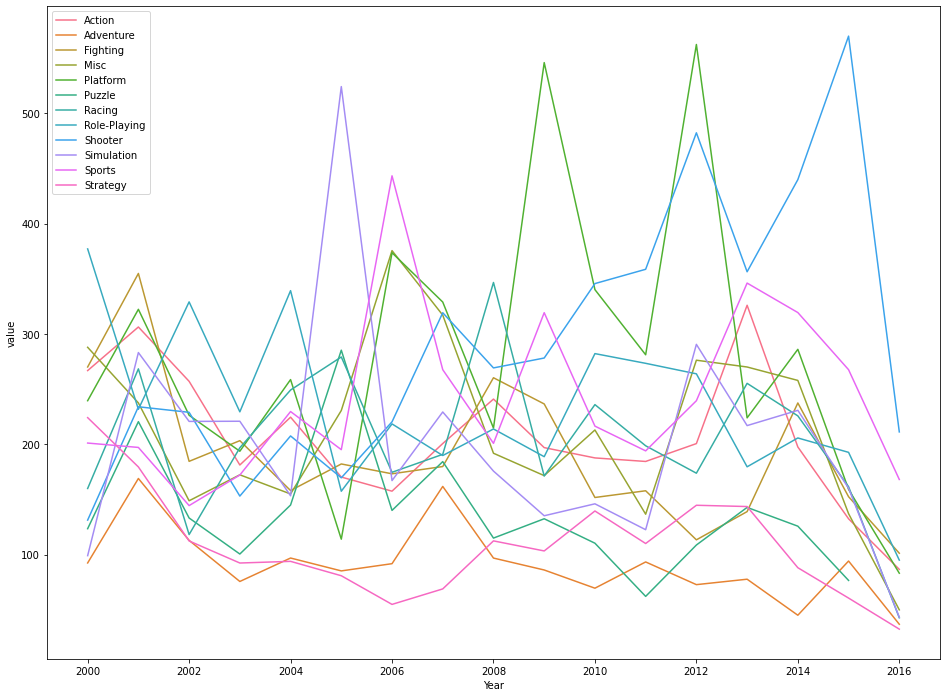

In [9]:
make_lineplot(df, min = 2000, max=2016)

In [8]:
def make_pie(df, min=1900, max=2022):
  df_gs = df[(df.Year >= min) & (df.Year <= max)].groupby('Genre')[sales_col].sum().T
  genre_col = df_gs.columns
  #total = np.sum(df_gs[genre_col].T)
  
  #for col in genre_col:
  #  df_gs[col] /= total

  plt.figure(figsize= [16, 16])
  df_gs = df_gs.T.sort_values('NA_Sales')
  for i, sale in enumerate(sales_col):
    x = plt.subplot(2, 2, i+1)
    x.ax = plt.pie(data= df_gs, x= sale, labels=df_gs.index)
    plt.title(sale)

  plt.legend();

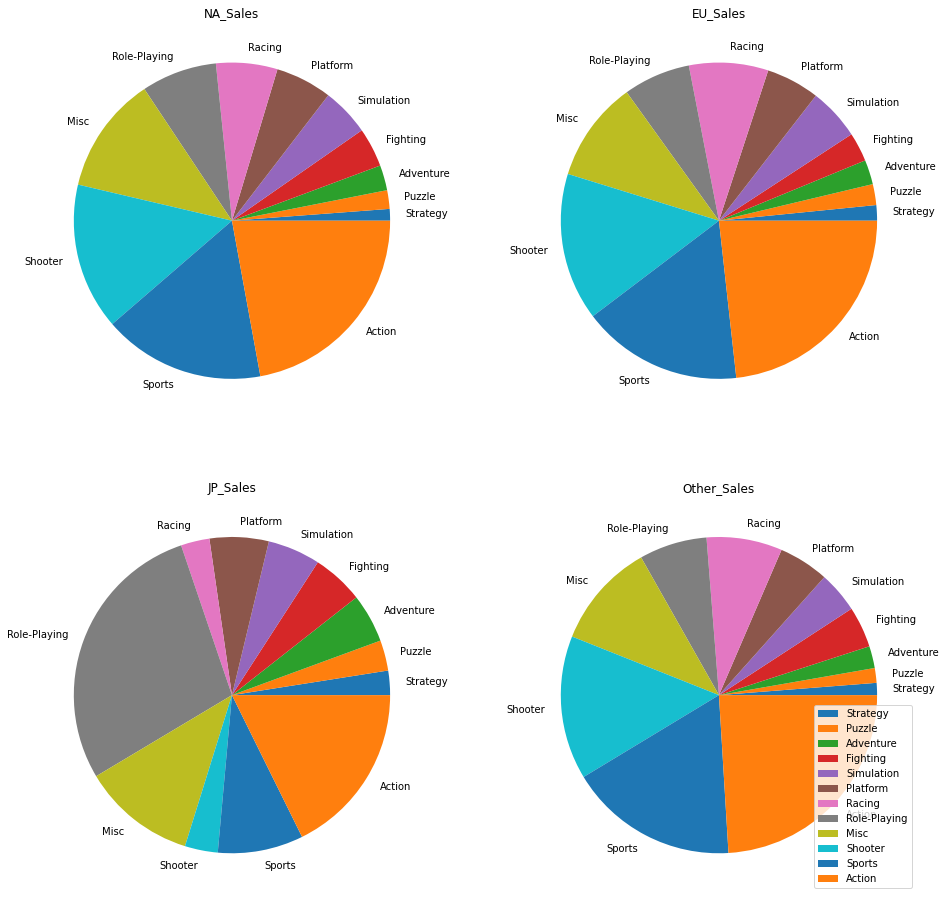

In [10]:
make_pie(df, min= 2005, max = 2016)